In [12]:
import pandas as pd
import os

# Directory in which the duration files are saved
directory = '/Users/sena/Desktop/datasci_project/copy/raw-copy/durations/'

# List all CSV-files from the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# List to save all dataframes
df_list = []

# Read all Files and extract the years
for file in csv_files:
    
    df = pd.read_csv(os.path.join(directory, file))
    
    # Extract year from file name 
    year = int(file.split('_')[1])  
    
    # Add Year as a new column
    df['Year'] = year
    
    # Add data frame to list
    df_list.append(df)

# Join all data frames
df_all_years = pd.concat(df_list, ignore_index=True)


print(df_all_years.head())

# Print all years in asc order 
print("\nAll Years:")
print(sorted(df_all_years['Year'].unique()))



          Title                           Artist  Duration_ms  Duration_s  \
0  "Heat Waves"                    Glass Animals       238805      238.81   
1   "As It Was"                     Harry Styles       167303      167.30   
2        "Stay"  The Kid Laroi and Justin Bieber        86983       86.98   
3  "Easy on Me"                            Adele       224694      224.69   
4     "Shivers"                       Ed Sheeran       207853      207.85   

   Duration_min  Year  
0          3.98  2022  
1          2.79  2022  
2          1.45  2022  
3          3.74  2022  
4          3.46  2022  

All Years:
[np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]


In [13]:
# Calculate average duration in minutes for each year
df_grouped = df_all_years.groupby('Year')['Duration_min'].mean().reset_index()


print(df_grouped)



    Year  Duration_min
0   2005      3.962727
1   2006      3.916162
2   2007      4.072121
3   2008      3.941111
4   2009      4.002500
5   2010      3.831300
6   2011      3.900606
7   2012      3.744400
8   2013      3.839592
9   2014      3.854300
10  2015      3.694400
11  2016      3.728100
12  2017      3.702600
13  2018      3.497200
14  2019      3.247700
15  2020      3.313100
16  2021      3.258283
17  2022      3.269184
18  2023      3.296768
19  2024      3.360500


/var/folders/8p/n4qmz14d4p762jkgzppdzm3c0000gn/T/ipykernel_15946/1752742855.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




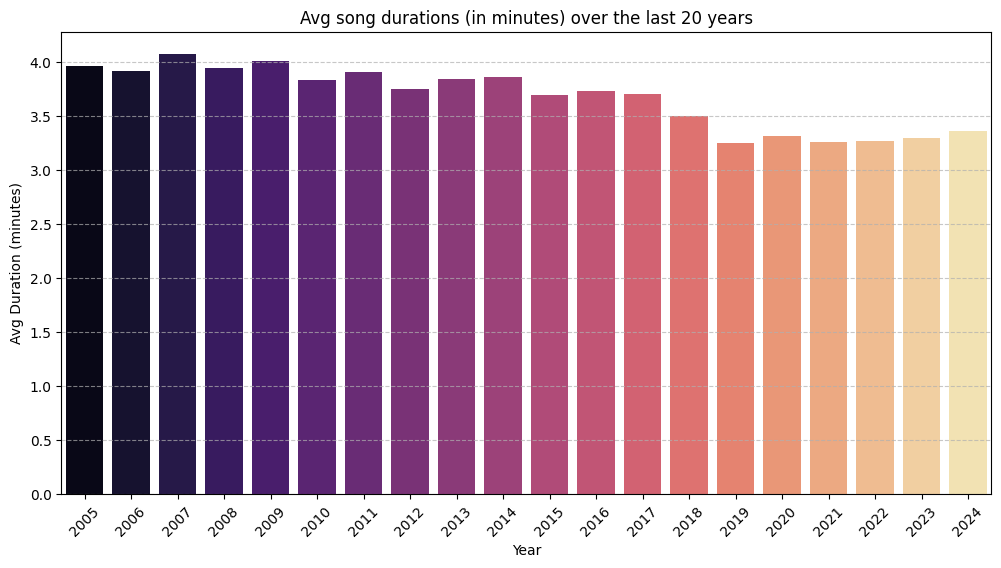

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average duration in minutes for each year
df_grouped = df_all_years.groupby('Year')['Duration_min'].mean().reset_index()

# Visualize avergae song duration as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Year', y='Duration_min', palette='magma')

# Diagram-Layout 
plt.title('Avg song durations (in minutes) over the last 20 years')
plt.xlabel('Year')
plt.ylabel('Avg Duration (minutes)')
plt.xticks(rotation=45)  # To make the years readable
plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.show()


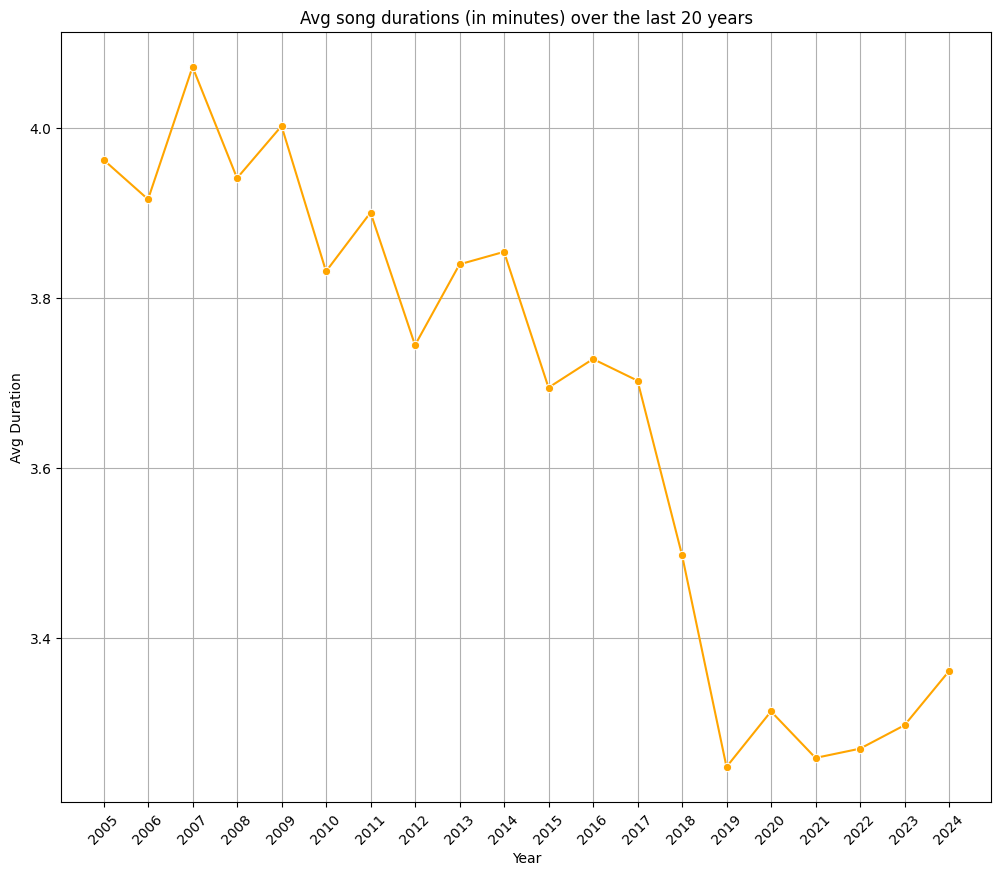

In [57]:


# Visualisation as line chart
plt.figure(figsize=(12, 10))
sns.lineplot(data=df_grouped, x='Year', y='Duration_min', marker='o', color='orange')

# Diagramm-Layout
plt.title('Avg song durations (in minutes) over the last 20 years')
plt.xlabel('Year')
plt.ylabel('Avg Duration')


plt.xticks(df_grouped['Year'], rotation=45)  


plt.grid(True)


plt.show()


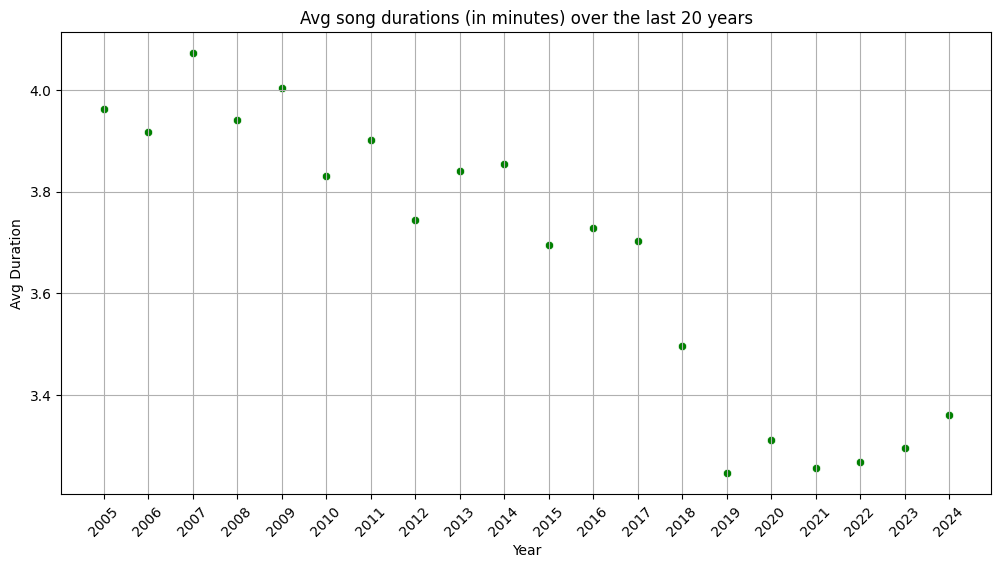

In [61]:
# Visualisation as a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_grouped, x='Year', y='Duration_min', color='green')

# Diagramm-Layout 
plt.title('Avg song durations (in minutes) over the last 20 years')
plt.xlabel('Year')
plt.ylabel('Avg Duration')
plt.xticks(df_grouped['Year'], rotation=45) 
plt.grid(True)


plt.show()


In [66]:
import plotly.express as px

# Interactive tvisualisation
fig = px.line(df_grouped, x='Year', y='Duration_min', title='Avg song durations (in minutes) over the last 20 years')

# Backgrouds
fig.update_layout(
    # Diagram background
    paper_bgcolor='seashell',  
    
    # Plot background
    plot_bgcolor='wheat',  # Farbe für den Hintergrund des Plots (der Bereich mit den Linien)
    
    
    xaxis=dict(showgrid=True, gridcolor='gray', zeroline=False, tickangle=45),
    yaxis=dict(showgrid=True, gridcolor='gray', zeroline=False),
    
    
    title="Avg song durations (in minutes) over the last 20 years"
)

# Show diagram as html (open in browser)
"""
After running this you can open the HTML file in your browser
"""
fig.write_html("avg_duration_interactive.html")



In [64]:
import plotly.express as px

# Interactive timeline
fig = px.line(df_grouped, x='Year', y='Duration_min', title='Avg song durations (in minutes) over the last 20 years')

# Add slider for the timeline
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  # A slider you can interact with.
        type='linear'
    ),
    title="Avg song durations (in minutes) over the last 20 years with a timeline"
)

# Save as a HTML file
fig.write_html("avg_duration_timeline.html")

